<a href="https://colab.research.google.com/github/AudouxH/Complexite-algorithmique-et-graphes/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1 : The Snowplow Problem**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sorted_order_waiting_time(positions):
    positions.sort()
    total_waiting_time = 0
    current_time = 0
    waiting_times = []

    for pos in positions:
        current_time += abs(pos)
        total_waiting_time += current_time
        waiting_times.append(current_time)

    return total_waiting_time, positions, waiting_times

In [3]:
def greedy_order_waiting_time(positions):
    current_position = 0
    total_waiting_time = 0
    current_time = 0
    remaining_positions = positions.copy()
    order = []
    waiting_times = []

    while remaining_positions:
        closest_house = min(remaining_positions, key=lambda x: abs(x - current_position))
        current_time += abs(closest_house - current_position)
        total_waiting_time += current_time
        order.append(closest_house)
        waiting_times.append(current_time)
        current_position = closest_house
        remaining_positions.remove(closest_house)

    return total_waiting_time, order, waiting_times


Sorted Order Waiting Time: 80
Sorted Order: [-10, -5, 1, 2, 3]
Sorted Order Waiting Times: [10, 15, 16, 18, 21]
Greedy Order Waiting Time: 33
Greedy Order: [1, 2, 3, -5, -10]
Greedy Order Waiting Times: [1, 2, 3, 11, 16]


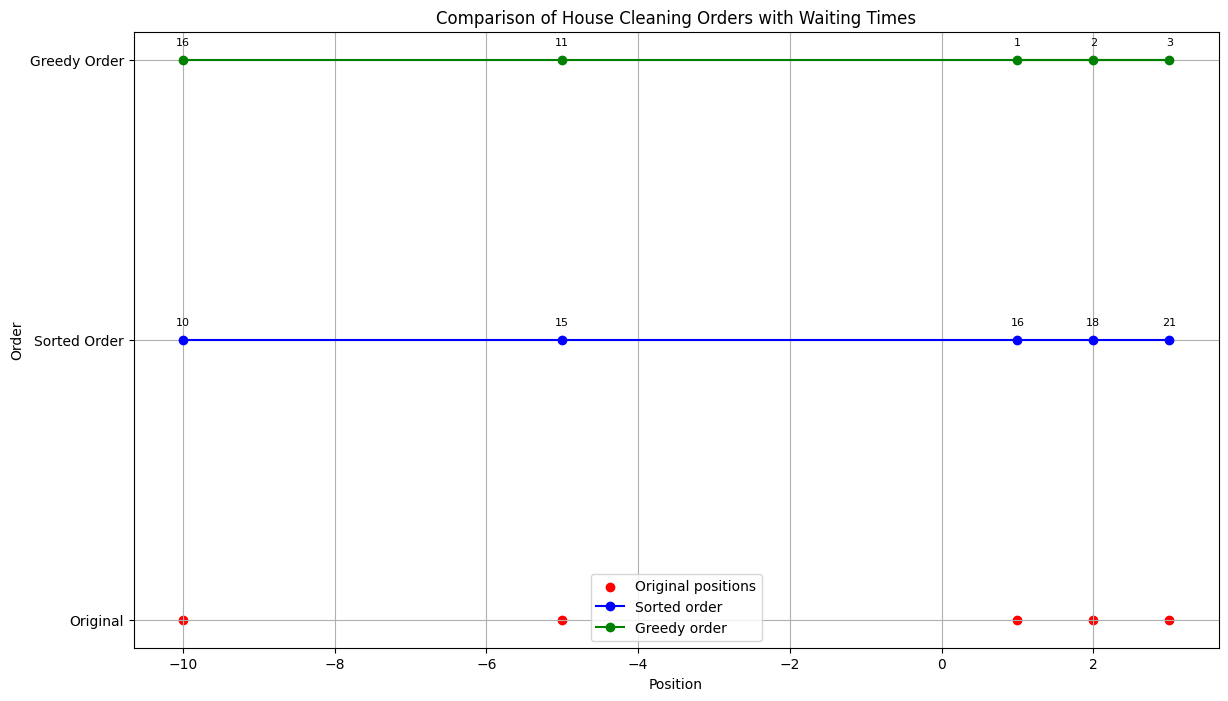

In [4]:
def plot_orders(sorted_order, greedy_order, positions, sorted_waiting_times, greedy_waiting_times):
    plt.figure(figsize=(14, 8))

    # Plot original positions
    plt.scatter(positions, np.zeros_like(positions), color='red', label='Original positions')

    # Plot sorted order
    plt.plot(sorted_order, np.zeros_like(sorted_order) + 1, 'bo-', label='Sorted order')
    for i, txt in enumerate(sorted_waiting_times):
        plt.annotate(txt, (sorted_order[i], 1), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

    # Plot greedy order
    plt.plot(greedy_order, np.zeros_like(greedy_order) + 2, 'go-', label='Greedy order')
    for i, txt in enumerate(greedy_waiting_times):
        plt.annotate(txt, (greedy_order[i], 2), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

    # Add labels and legend
    plt.yticks([0, 1, 2], ['Original', 'Sorted Order', 'Greedy Order'])
    plt.xlabel('Position')
    plt.ylabel('Order')
    plt.legend()
    plt.title('Comparison of House Cleaning Orders with Waiting Times')
    plt.grid(True)
    plt.show()

# Example positions
positions = [-10, -5, 1, 2, 3]

# Calculate orders and waiting times
sorted_time, sorted_order, sorted_waiting_times = sorted_order_waiting_time(positions)
greedy_time, greedy_order, greedy_waiting_times = greedy_order_waiting_time(positions)

# Print results
print("Sorted Order Waiting Time:", sorted_time)
print("Sorted Order:", sorted_order)
print("Sorted Order Waiting Times:", sorted_waiting_times)
print("Greedy Order Waiting Time:", greedy_time)
print("Greedy Order:", greedy_order)
print("Greedy Order Waiting Times:", greedy_waiting_times)

# Plot the orders
plot_orders(sorted_order, greedy_order, positions, sorted_waiting_times, greedy_waiting_times)



Temps de parcours: 0.00011 secondes, Distance totale: 4403.26
Temps optimisé (2-opt): 0.16066 secondes, Distance totale: 4403.26
Temps glouton: 0.00107 secondes, Distance totale: 7362.17
Ratio parcours/glouton: 59.81%
Ratio optimisé/glouton: 59.81%


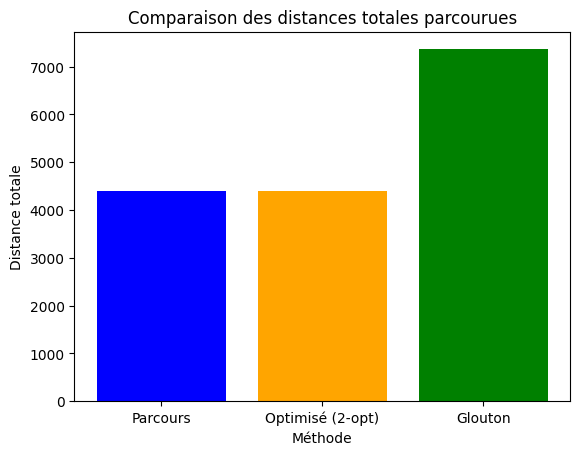

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

n = 100
positions = np.random.normal(0, 1000, n).tolist()

# Fonction parcours : Approche simplifiée de TSP (tri simple des positions)
def parcours(house_positions):
    sorted_positions = sorted(house_positions)
    return sorted_positions

# Fonction 2-opt pour optimiser la solution
def two_opt(route):
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue  # Skip adjacent nodes
                new_route = route[:]
                new_route[i:j] = route[j-1:i-1:-1]  # This is the 2-opt swap
                if calculate_total_distance(new_route) < calculate_total_distance(best):
                    best = new_route
                    improved = True
        route = best
    return best

# Fonction glouton : Aller à la maison la plus proche à chaque étape
def glouton(house_positions):
    remaining_positions = house_positions[:]
    current_position = remaining_positions.pop(0)
    cleaning_order = [current_position]

    while remaining_positions:
        next_position = min(remaining_positions, key=lambda x: abs(x - current_position))
        cleaning_order.append(next_position)
        remaining_positions.remove(next_position)
        current_position = next_position

    return cleaning_order

# Calculer la distance totale parcourue pour une liste ordonnée de positions
def calculate_total_distance(order):
    total_distance = 0
    for i in range(1, len(order)):
        total_distance += abs(order[i] - order[i-1])
    return total_distance

# Mesurer le temps et les distances de nettoyage pour la fonction parcours
start_time = time.perf_counter()
parcours_order = parcours(positions)
parcours_time = time.perf_counter() - start_time
parcours_distance = calculate_total_distance(parcours_order)

# Optimiser la solution de parcours avec 2-opt
start_time = time.perf_counter()
optimized_order = two_opt(parcours_order)
optimized_time = time.perf_counter() - start_time
optimized_distance = calculate_total_distance(optimized_order)

# Mesurer le temps et les distances de nettoyage pour la fonction glouton
start_time = time.perf_counter()
glouton_order = glouton(positions)
glouton_time = time.perf_counter() - start_time
glouton_distance = calculate_total_distance(glouton_order)

# Afficher les résultats
print(f"Temps de parcours: {parcours_time:.5f} secondes, Distance totale: {parcours_distance:.2f}")
print(f"Temps optimisé (2-opt): {optimized_time:.5f} secondes, Distance totale: {optimized_distance:.2f}")
print(f"Temps glouton: {glouton_time:.5f} secondes, Distance totale: {glouton_distance:.2f}")

# Comparer les distances et vérifier si parcours est inférieur à 90% du temps glouton
parcours_ratio = parcours_distance / glouton_distance
optimized_ratio = optimized_distance / glouton_distance

print(f"Ratio parcours/glouton: {parcours_ratio:.2%}")
print(f"Ratio optimisé/glouton: {optimized_ratio:.2%}")

# Graphique de comparaison des distances totales
labels = ['Parcours', 'Optimisé (2-opt)', 'Glouton']
distances = [parcours_distance, optimized_distance, glouton_distance]

plt.bar(labels, distances, color=['blue', 'orange', 'green'])
plt.xlabel('Méthode')
plt.ylabel('Distance totale')
plt.title('Comparaison des distances totales parcourues')
plt.show()


# Proof of Polynomial Time Complexity for the Algorithm `parcours`

## Description de l'Algorithme

L'algorithme `parcours` se compose principalement des étapes suivantes :

1. **Tri des positions des maisons** : Utilisation de l'algorithme de tri intégré de Python (Timsort).
2. **Optimisation avec 2-opt (optionnel)** : Amélioration de la solution initiale en utilisant l'algorithme 2-opt.

## Analyse de la Complexité

### Étape 1 : Tri des positions des maisons

L'algorithme de tri intégré de Python utilise le tri Timsort, qui a une complexité en temps de \(O(n \log n)\), où \(n\) est le nombre de maisons.

- **Complexité du tri** : \(O(n \log n)\)

### Étape 2 : Optimisation avec 2-opt (optionnel)

L'algorithme 2-opt améliore une solution initiale en échangeant des paires de liens pour réduire la distance totale parcourue. L'algorithme effectue des swaps jusqu'à ce qu'il n'y ait plus d'améliorations possibles.

1. **Boucle principale** : La boucle continue jusqu'à ce qu'aucune amélioration ne soit trouvée.
2. **Boucle interne** : Les boucles imbriquées parcourent toutes les paires possibles de liens à échanger.

- **Nombre de swaps potentiels** : Pour chaque paire (i, j), le nombre d'itérations est approximativement \(\frac{n(n-1)}{2}\).
- **Calcul de la distance** : Chaque swap nécessite le recalcul de la distance totale, ce qui prend \(O(n)\) temps.

La complexité temporelle approximative de l'algorithme 2-opt est :

- **Complexité du 2-opt** : \(O(n^3)\)

Cependant, l'algorithme 2-opt est optionnel et destiné à améliorer une solution déjà polynomiale.

## Conclusion

L'algorithme `parcours` initial, qui utilise uniquement le tri des positions des maisons, a une complexité temporelle de \(O(n \log n)\). Même avec l'optimisation optionnelle 2-opt, la complexité reste polynomiale.
